## 유방암 데이터를 활용하여 결정트리(decisiontree) 학습

In [1]:
# 데이터 로드 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [2]:
# X, y 설정 
X = cancer.data 
y = cancer.target

In [3]:
# 훈련데이터 split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,)

In [4]:
# 결정트리 모델 불러오기 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)

In [12]:
# clf = DecisionTreeClassifier(criterion='gini',max_depth= 6)
clf = DecisionTreeClassifier(
                            criterion='entropy',
#                              criterion='gini',
                             max_depth= 5,
                             random_state=42) # 트리가 고정? 
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [13]:
y_pred = clf.predict(X_test)

In [14]:
# 평가 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9532163742690059

설치하기 

```shell
!pip install pydotplus
```

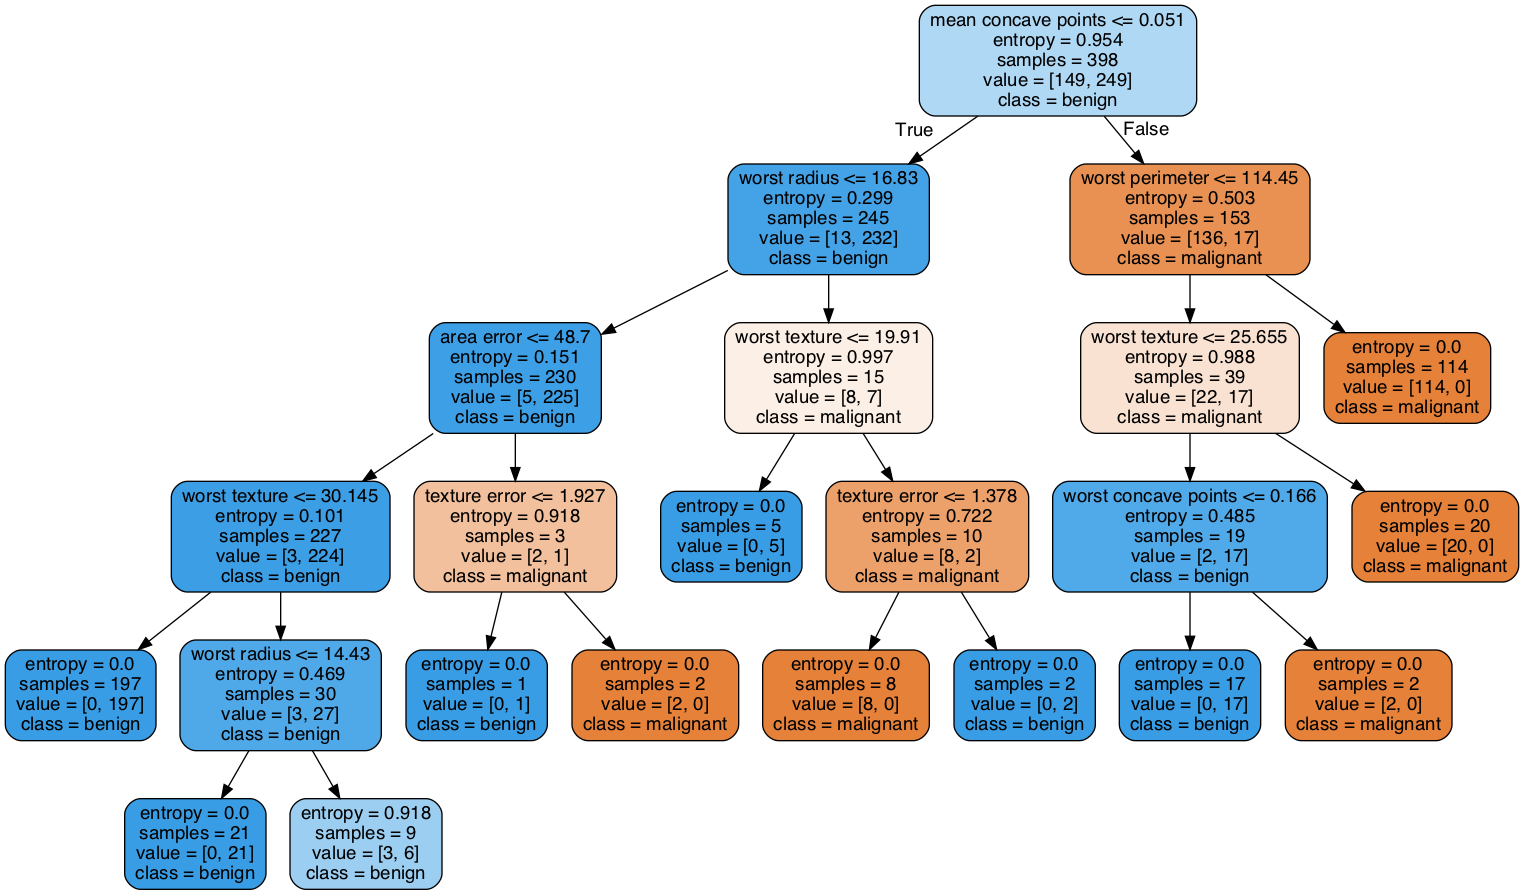

In [15]:
# 그래프 그리기 
from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image
dt_dot_data = export_graphviz(clf, 
                                   feature_names = cancer.feature_names, # feauture name 설정 
                                   class_names = cancer.target_names, # target name 설정 
                                   filled= True, rounded= True # 색깔 넣고, 모서리 라운드 
                                  ) # clf(분류모델)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data) # 트리그래프만들기 
Image(dt_graph.create_png()) # image show 